In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# 1. Generons un dataset aleatoirement pour un probleme de regression lineaire

Dimension de x: (100, 1)
Dimension de y: (100,)


Text(0, 0.5, 'axes de y')

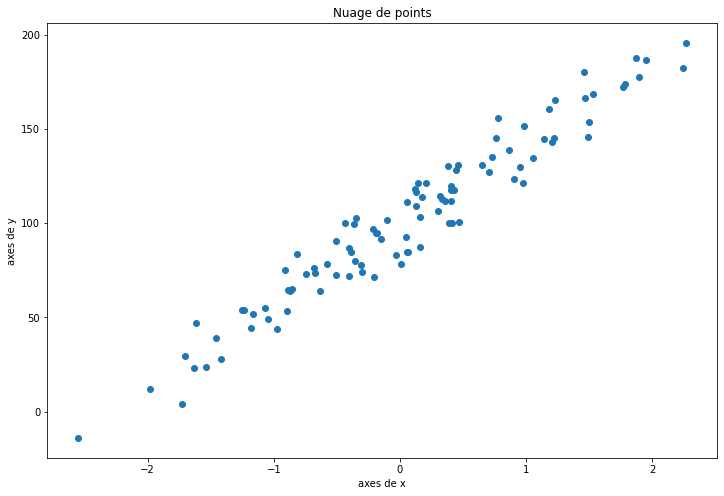

In [132]:
np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + 100
print("Dimension de x:", x.shape)
print("Dimension de y:", y.shape)
plt.figure(figsize=(12,8))
plt.title("Nuage de points")
plt.scatter(x,y)
plt.xlabel("axes de x")
plt.ylabel("axes de y")

In [147]:
# on redimensionne y et on ajoute le bias a x
y = y.reshape((y.shape[0],1))
X = np.concatenate((x,np.ones(y.shape)),axis=1)
print(X.shape)

(100, 2)


## 2.Modele

In [134]:
def model(X,theta):
    return X.dot(theta)

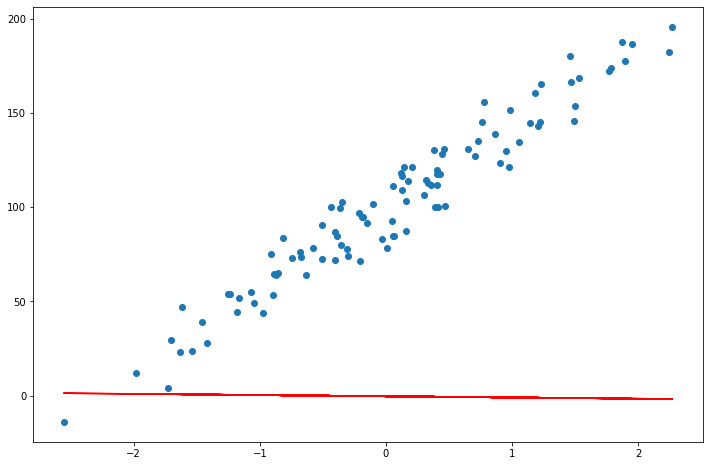

In [135]:
theta = np.random.randn(2,1)
plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.plot(x, model(X,theta),'r')

## 3.Fonction cout

In [136]:
def cost_function(X,y,theta):
    m=len(y)
    J = 1/(2*m)*np.sum((model(X,theta) - y)**2)
    return J

## 4.Definir la fonction gradient

In [137]:
def gradient(X,y,theta):
    return 1/m * X.T.dot((X.dot(theta) - y))

## 5.Algorithme de la Descente de Gradient

In [138]:
def gradient_descent(X,y,theta, learning_rate, iterations):
    
    m=len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for i in range(0,iterations):
        prediction = model(X,theta)
        theta = theta - learning_rate * gradient(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
        theta_history[i,:] = theta.T
        
    return theta, cost_history, theta_history

## 6.Machine Learning

In [139]:
iterations=300
learning_rate = 0.01
m=100
theta_final, cost_history, theta_history = gradient_descent(X,y,theta,learning_rate=learning_rate, iterations=iterations)

## Visualisaton des courbes d'apprentissage

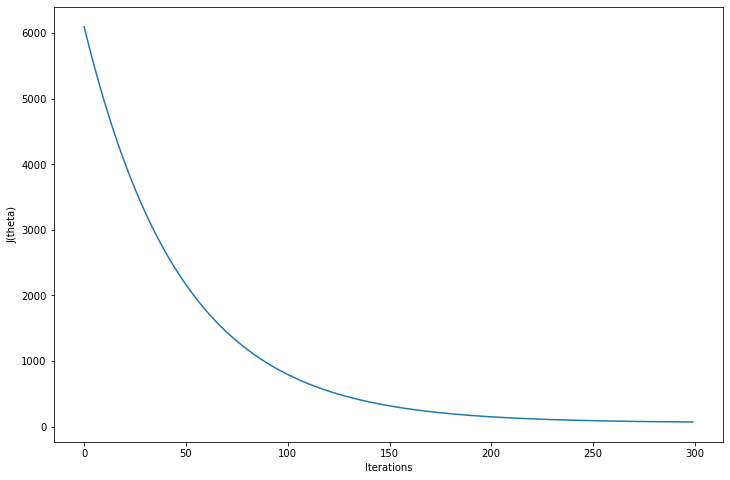

In [140]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylabel("J(theta)")
ax.set_xlabel("Iterations")
_ = ax.plot(range(iterations), cost_history)

## Visualisation du modele au cours de son apprentissage

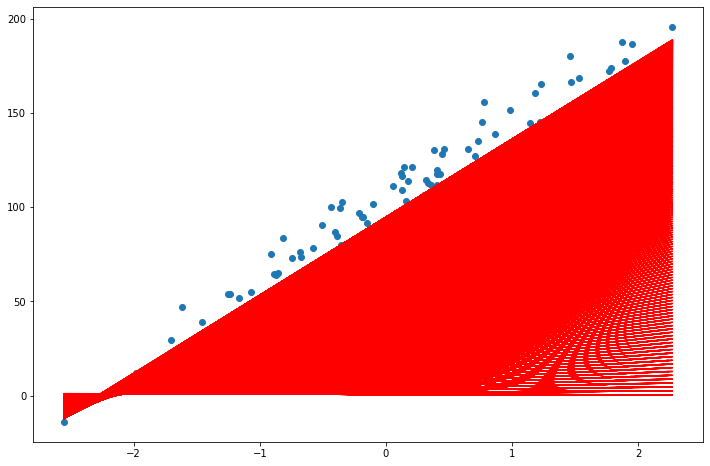

In [141]:
plt.figure(figsize=(12,8))
plt.scatter(x,y)
for i in range(iterations):
    plt.plot(x,model(X,theta_history[i].T),'r')

## Modele entraine

Text(0, 0.5, 'axe de y')

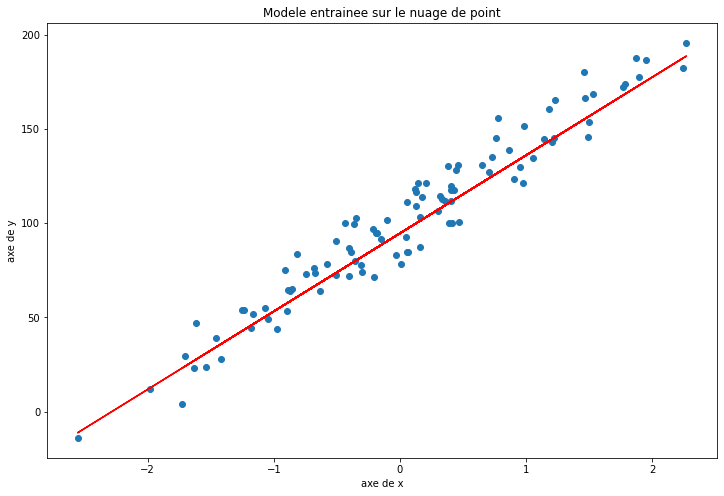

In [142]:
plt.figure(figsize=(12,8))
plt.title("Modele entrainee sur le nuage de point")
plt.scatter(x,y)
plt.plot(x,model(X,theta_final),'r')
plt.xlabel("axe de x")
plt.ylabel("axe de y")

In [143]:
cost_function(X,y,theta_final)

68.6229484209286

In [144]:
def coef_determination(y,pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [145]:
pred = model(X,theta_final)
coef_determination(y,pred)

0.9299528188921395

In [146]:
theta_final

array([[41.45005694],
       [94.59900455]])